In [1]:
import pandas as pd
import numpy as np


In [6]:
df = pd.read_csv("F:/Python DS/db/BreastCancer.csv")
df

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,Malignant
695,1371026,5,10,10,10,4,10,5,6,3,Malignant
696,1371920,5,1,1,1,2,1,3,2,1,Benign
697,8233704,4,1,1,1,1,1,2,1,1,Benign


In [9]:

dum_df = pd.get_dummies(df, drop_first=True)
dum_df = dum_df.drop('Code',axis =1)
dum_df

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class_Malignant
0,5,4,3,1,2,2,2,3,1,0
1,9,1,2,6,4,10,7,7,2,1
2,10,4,7,2,2,8,6,1,1,1
3,6,10,10,10,8,10,7,10,7,1
4,1,1,1,1,2,5,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,10,10,10,10,5,10,10,10,7,1
695,5,10,10,10,4,10,5,6,3,1
696,5,1,1,1,2,1,3,2,1,0
697,4,1,1,1,1,1,2,1,1,0


In [4]:

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC


In [10]:

X = dum_df.iloc[:,0:9]
y = dum_df.iloc[:,9]



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)


In [12]:
svc = SVC(probability = True,kernel='linear')
fitSVC = svc.fit(X_train, y_train)
y_pred = fitSVC.predict(X_test)



In [13]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))


[[135   3]
 [  1  71]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       138
           1       0.96      0.99      0.97        72

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210

0.9809523809523809


In [14]:

# ROC
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = svc.predict_proba(X_test)[:,1]



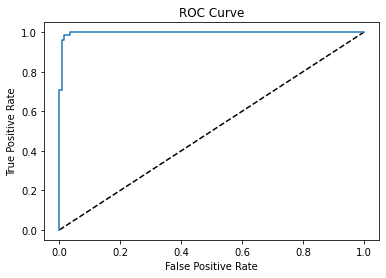

0.9972826086956522

In [15]:

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)